<a href="https://colab.research.google.com/github/FelipeVillegasH/Tareas_Coding_Dojo_Track2/blob/main/Comparison_between_Kmeans_AgglomerativeClustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine learning Comparison between Kmeans, AgglomerativeClustering, DBSCAN 

---


### By Felipe Villegas

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/Track 2/Semana 8/cust_seg.csv', index_col= 'Customer Id')
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


Data Cleaning

In [29]:
df.info()
# we do not know what the unnamed feature is therefore we drop it

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


In [30]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [31]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [32]:
df['Defaulted'].value_counts()
# 183 Defaulted

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

Kmeans

In [54]:
# Scale
scaler = StandardScaler()
# Adjust and transform
scaled_df = scaler.fit_transform(df)

In [36]:
# Instantiating and fitting
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
# Since the graphics are hard to visualize we only use 3 clusters

KMeans(n_clusters=3)

In [37]:
# Labels generated according to the clusters and generating a new column in the data frame 
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,2
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,2


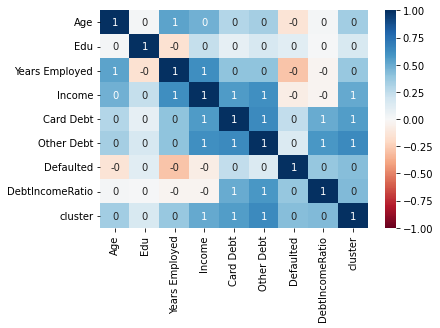

In [38]:
# we use a heatmap to identify the best features according to their correlation to further graphically identify tendencies
sns.heatmap(df.corr(),
            cmap='RdBu',
            vmin=-1,
            annot=True, 
            fmt='.0f',
            vmax=1);

# Variables selected: 
# DebtIncomeRatio vs. Other Debt
# Income vs. Years Employed

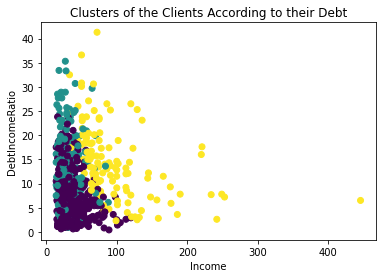

In [39]:
# Clusters Visualizing
plt.scatter(df['Income'], df['DebtIncomeRatio'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.title('Clusters of the Clients According to their Debt');
# here we can appreciate a tendency that the more income the less debt and viceversa

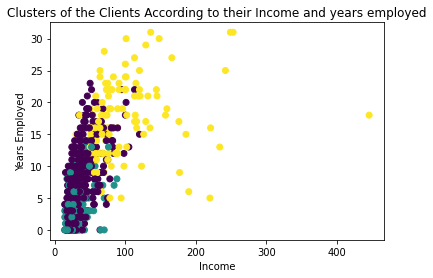

In [40]:
# Clusters Visualizing
plt.scatter(df['Income'], df['Years Employed'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('Years Employed')
plt.title('Clusters of the Clients According to their Income and years employed');
# Accodding to the income the less years employed then the less income so as we can appreciate as the purple cluster represents the lower income 
# And also the lower years employed.
# In the other hand, the yellow cluster represents the medium years employed and a little bit more of income. 

In [41]:
df['cluster'].value_counts()
# note that the less number of clusters tend to consider and aggrupate the noice into clusters

0    414
1    161
2    125
Name: cluster, dtype: int64

In [42]:
segment = df[df['cluster']== 0]
segment1 = df[df['cluster']== 1]
segment2 = df[df['cluster']== 2]

In [43]:
segment.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.00000,414.0,414.000000,414.0
mean,33.727053,1.601449,7.644928,36.246377,0.788126,1.74871,0.0,7.581884,0.0
std,6.881592,0.862508,5.252188,17.847272,0.717996,1.23400,0.0,4.726248,0.0
min,20.000000,1.000000,0.000000,14.000000,0.012000,0.04600,0.0,0.400000,0.0
25%,29.000000,1.000000,4.000000,24.000000,0.273750,0.86075,0.0,4.200000,0.0
50%,33.000000,1.000000,7.000000,32.000000,0.560000,1.43150,0.0,6.650000,0.0
75%,39.000000,2.000000,11.000000,44.000000,1.069000,2.35425,0.0,10.100000,0.0
max,53.000000,5.000000,23.000000,120.000000,4.637000,7.28600,0.0,23.800000,0.0


In [44]:
segments_loop = [segment, segment1, segment2]

In [45]:
for segment in segments_loop: 
  print(segment.describe().T)
# T stands for transpose to flip the columns(Variables) into rows 

                 count       mean        std  ...      50%       75%      max
Age              414.0  33.727053   6.881592  ...  33.0000  39.00000   53.000
Edu              414.0   1.601449   0.862508  ...   1.0000   2.00000    5.000
Years Employed   414.0   7.644928   5.252188  ...   7.0000  11.00000   23.000
Income           414.0  36.246377  17.847272  ...  32.0000  44.00000  120.000
Card Debt        414.0   0.788126   0.717996  ...   0.5600   1.06900    4.637
Other Debt       414.0   1.748710   1.234000  ...   1.4315   2.35425    7.286
Defaulted        414.0   0.000000   0.000000  ...   0.0000   0.00000    0.000
DebtIncomeRatio  414.0   7.581884   4.726248  ...   6.6500  10.10000   23.800
cluster          414.0   0.000000   0.000000  ...   0.0000   0.00000    0.000

[9 rows x 8 columns]
                 count       mean        std  ...     50%     75%     max
Age              161.0  31.366460   7.714183  ...  29.000  36.000  55.000
Edu              161.0   1.850932   0.936824  ... 

In [46]:
Income_Means= [np.mean(segment['Income'])for segment in segments_loop]
YearsEmployed_Means = [np.mean(segment['Years Employed'])for segment in segments_loop]
DebtIncomeRatio_Means= [np.mean(segment['DebtIncomeRatio'])for segment in segments_loop]
print('The mean values of income for each cluster is:', Income_Means)

The mean values of income for each cluster is: [36.2463768115942, 30.48447204968944, 96.056]


In [47]:
# create a df to organice the means
summary = pd.DataFrame({'segments_loop': ['segment','segment1','segment2'],
                        'Income_Means': Income_Means,
                        'YearsEmployed_Means': YearsEmployed_Means,
                        'DebtIncomeRatio_Means': DebtIncomeRatio_Means,})
summary.head()

,segments_loop,Income_Means,YearsEmployed_Means,DebtIncomeRatio_Means
0,segment,36.246377,7.644928,7.581884
1,segment1,30.484472,3.689441,13.936025
2,segment2,96.056000,16.904000,14.398400


<BarContainer object of 3 artists>

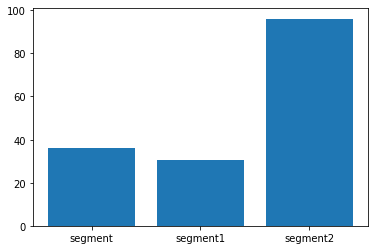

In [48]:
plt.bar(summary['segments_loop'],summary['Income_Means'])
# visualizing the segments and its differences> segment 1 representing the higher income should have a different strategy than the other segments

In [57]:
# Best number of clusters to be used using the silhouette Metric
from sklearn.metrics import silhouette_score
silhouette = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette.append(silhouette_score(scaled_df, kmeans.labels_))

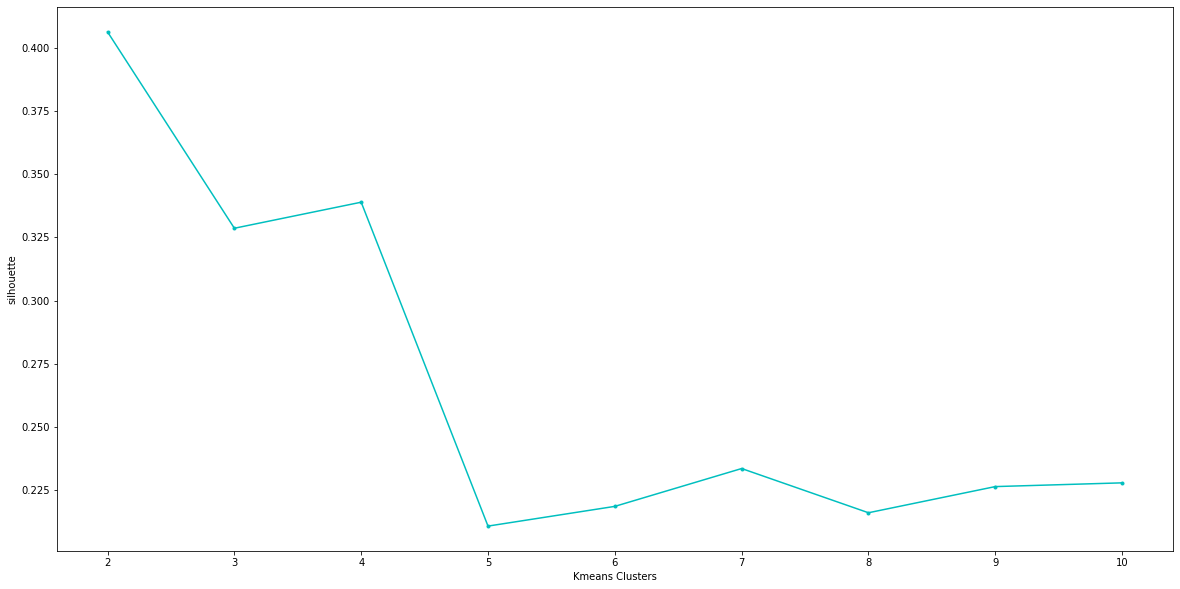

In [60]:
plt.figure(figsize = (20, 10));
plt.plot(range(2, 11), silhouette, marker = '.', color = 'c');
plt.xlabel('Kmeans Clusters');
plt.ylabel('silhouette');
# the more Silhouette the optimal number of clusters in this presice case the best cluster number is 2 

In [63]:
# Applying the optimal nuymber of clusters to the df
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
df['Kmeans Clusters'] = kmeans.labels_

In [64]:
silhouette_score(scaled_df, df['Kmeans Clusters'])

0.4075584197978113

AgglomerativeClustering

In [66]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

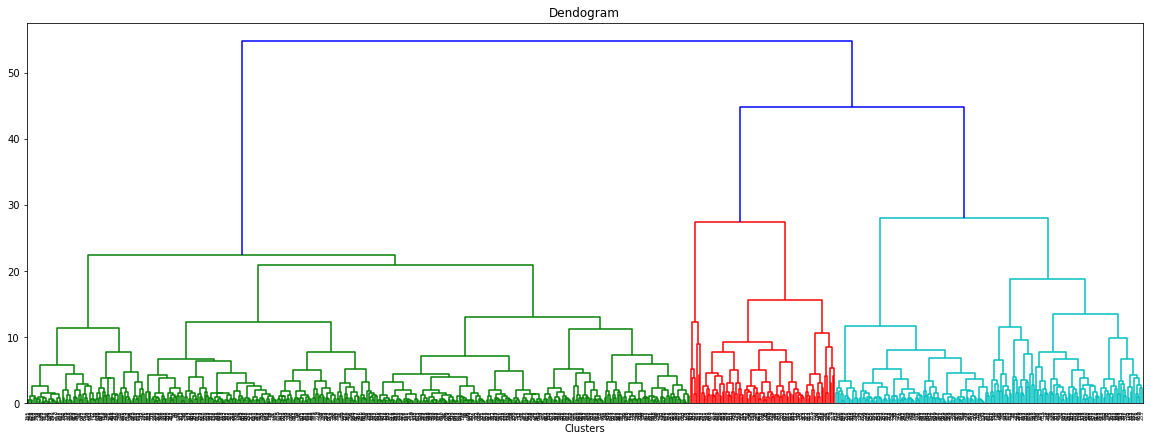

In [73]:
plt.figure(figsize = (20, 7));
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'));
plt.xlabel('Clusters')
plt.title('Dendogram');

In [68]:
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)
df['HC Clusters'] = hc.labels_

In [69]:
silhouette_score(scaled_df, df['HC Clusters'])

0.32971155902819177

DBScan
 

In [70]:
# the DBS does not need to use the Silhouete metric due to its automatic definition of clusters according to the & and the minimum points
dbs = DBSCAN().fit(scaled_df)
df['DBS Clusters'] = dbs.labels_

In [71]:
silhouette_score(scaled_df, df['DBS Clusters'])

-0.29307533324935287

In [72]:
# Clusters for each method saved in the data frame 
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster,Kmeans Clusters,HC Clusters,DBS Clusters
Customer Id,,,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0,1,1,-1
2,47,1,26,100,4.582,8.218,0.0,12.8,2,0,2,-1
3,33,2,10,57,6.111,5.802,1.0,20.9,1,0,0,-1
4,29,2,4,19,0.681,0.516,0.0,6.3,0,1,1,1
5,47,1,31,253,9.308,8.908,0.0,7.2,2,0,2,-1


# Considering the Silhouette Score the best method to perform the unsupervised machine learning for this Data set is the Kmeans
# but it must be said that everything depends on the relative importance that the client assign to the clusters assigned. Or either if the client assign clusters according to the Empirical experience 